# Object-Oriented Programming


Adapted from [Jeff Knupp](https://hackernoon.com/improve-your-python-python-classes-and-object-oriented-programming-d09ff461168d).

A good ressource on object-oriented programming in Python can be found in [Python's doc](https://docs.python.org/3/tutorial/classes.html).

## What is a Class?

A class is a structure in Python that can be used as a blueprint to create objects that have 
1. prototyped features, "attributes" that are variable
2. "methods" which are functions that can be applied to the object that is created, or rather, an instance of that class. 

## Defining a Class

We want to define a class called `Client` in which a new instance stores a client's name, balance, and account level.
It will take the format of:
    
    class Client():
        def __init__(self, args[, ...]:
            # more code
            
"def `__init__`" is what we use when creating classes to define how we can create a new instance of this class. 

The arguments of `__init__` are required input when creating a new instance of this class, except for 'self'. 

In [1]:
class Client():
    """Client is a class which stores client's `name`, `balance` and account `level."""
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance + 100
        
        #define account level
        if self.balance < 5000:
            self.level = "Basic"
        elif self.balance < 15000:
            self.level = "Intermediate"
        else:
            self.level = "Advanced"
            

The **attributes** of the `Client` class are: *name, balance* and *level*. 

**Note**: "self.name" and "name" are different variables. Here they represent the same values, but in other cases, this may lead to problems. For example, here the bank has decided to update "self.balance" by giving all new members a bonus $100 on top of what they're putting in the bank. Calling "balance" for other calculations will not have the correct value.

### Creating an Instance of a Class

Now, lets try creating some new clients named John_Doe, and Jane_Defoe:

In [2]:
John_Doe = Client("John Doe", 500)
Jane_Defoe = Client("Jane Defoe", 150000)

We can see the attributes of John_Doe, or Jane_Defoe by calling them:

In [3]:
print(John_Doe.name)
print(Jane_Defoe.level)
print(Jane_Defoe.balance)

John Doe
Advanced
150100


We can also add, remove or modify attributes as we like:

In [4]:
John_Doe.email = "jdoe23@gmail.com"
John_Doe.email = "johndoe23@gmail.com"
del John_Doe.email

In [5]:
print(getattr(John_Doe, 'name'))
setattr(John_Doe, 'email', 'jdoe23@gmail.com')
print(John_Doe.email)
print(hasattr(John_Doe, 'email'))

John Doe
jdoe23@gmail.com
True


You can also use the following instead instead of the normal statements:

- The `getattr(obj, name[, default])` : to access the attribute of object.

- The `hasattr(obj,name)` : to check if an attribute exists or not.

- The `setattr(obj,name,value)` : to set an attribute. If attribute does not exist, then it would be created.

- The `delattr(obj, name)` : to delete an attribute.

### Class Attributes vs. Normal Attributes

A class attribute is an attribute set at the class-level rather than the instance-level, such that the value of this attribute will be the same across all instances.

For our *Client* class, we might want to set the name of the bank, and the location, which would not change from instance to instance.

In [6]:
Client.bank = "Toronto-Dominion bank"
Client.location = "Toronto, ON"

In [7]:
# try calling these attributes at the class and instance level
print(Client.bank)
print(Jane_Defoe.bank)

Toronto-Dominion bank
Toronto-Dominion bank


### Methods

*Methods* are functions that can be applied (only) to instances of your class. 

For example, in the case of our 'Client' class, we may want to update a person's bank account once they withdraw or deposit money. Let's create these methods below. 

Note that each method takes 'self' as an argument along with the arguments required when calling this method.

In [ ]:
# Use the Client class code above to now add methods for withdrawal and depositing of money

# create the Client class below
class Client():
    def __init__(self, name, balance):
        self.name = name
        self.balance = balance + 100
        
        #define account level
        if self.balance < 5000:
            self.level = "Basic"
        elif self.balance < 15000:
            self.level = "Intermediate"
        else:
            self.level = "Advanced"
            
    def deposit(self, amount):
        self.balance += amount
        return self.balance
    
    def withdraw(self, amount):
        if amount > self.balance:
            raise RuntimeError("Insufficient for withdrawal")
        else:
            self.balance -= amount
        return self.balance

In [ ]:
John_Doe = Client("John Doe", 500)
Jane_Defoe = Client("Jane Defoe", 150000)

Jane_Defoe.deposit(150000)

#### What is "self"? 
`*`*not in the philosophical sense*`*`

In the method, withdraw(self, amount), the self refers to the *instance* upon which we are applying the instructions of the method. 

When we call a method, `f(self, arg)`, on the object `x`, we use `x.f(arg)`.
- `x` is passed as the first argument, *self*, by default and all that is required are the other arguments that comprise the function. 

It is equivalent to calling `MyClass.f(x, arg)`.
Try it yourself with the Client class and one of the methods we've written.

In [ ]:
# Try calling a method two different ways
print(John_Doe.deposit(500))
print(Client.withdraw(Jane_Defoe, 50000))

### Exercise 1. Circle class
Create a `Circle` class that is initialized with two attributes
- the radius R is a float 
- the (x, y) coordinates of the circle center is a numpy array.

Class methods are: 
- `area`, which returns the area of the circle
- `plot`, which plots a filled circle using a transparancy of 0.5 (i.e., use keyword argument `alpha=0.5` in the `plt.fill` function). 

Make a plot of 20 circles with random centers and radii to demonstrate that the class works correctly.

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

class Circle():
    def __init__(self, radius, coordinates):
        self.radius = radius
        self.center = coordinates
    
    def area(self):
        area = np.pi * self.radius**2
        return area
    
    def plot(self):
        angle = np.linspace(0 , 2 * np.pi , 150) 
        x = self.radius * np.cos(angle) + self.center[0]
        y = self.radius * np.sin(angle) + self.center[1]
        plt.fill(x, y, alpha=0.5)
        


In [43]:
circ = Circle(0.1, np.array([0.0, 0.0]))

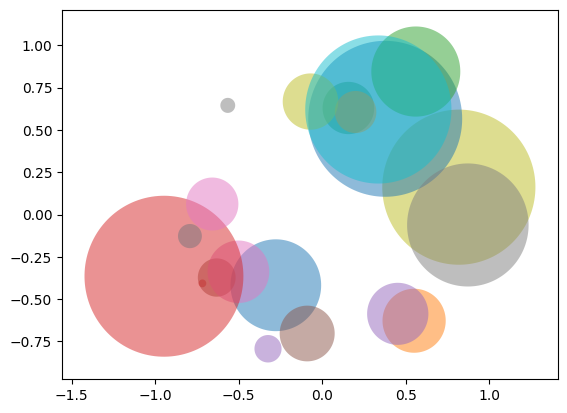

In [47]:
for i in range(20):
    x = np.random.rand()*2.0 - 1.0
    y = np.random.rand()*2.0 - 1.0
    circ.radius = np.random.rand()*0.5
    circ.center = np.array([x, y])
    circ.plot()


### Key Concept: Inheritance

A 'child' class can be created from a 'parent' class, whereby the child will bring over attributes and methods that its parent has, but where new features can be created as well. 

This would be useful if you want to create multiple classes that would have some features that are kept the same between them. You would simply create a parent class of these children classes that have those maintained features.

Imagine we want to create different types of clients but still have all the base attributes and methods found in client currently. 

For example, let's create a class called *Savings* that inherits from the *Client* class. In doing so, we do not need to write another `__init__` method as it will inherit this from its parent.

In [48]:
# create the Savings class below
class Savings(Client):
    interest_rate = 0.05
    
    def update_balance(self):
        self.balance += self.balance*self.interest_rate
        return self.balance


In [49]:
# create an instance the same way as a Client but this time by calling Savings instead
Lina_Tran = Savings("Lina Tran", 50)

In [50]:
# it now has access to the new attributes and methods in Savings...
print(Lina_Tran.name)
print(Lina_Tran.balance)
print(Lina_Tran.interest_rate)

Lina Tran
150
0.05


In [51]:
# ...as well as access to attributes and methods from the Client class as well
Lina_Tran.update_balance()

157.5

## Functions
We can always define functions outside classes. 

    def function_name(args):
        # more code
        ouput = 0
        return output
        
If the functions calls itself, it is called a recursice function. 

In [52]:
def countdown(n):
    print(n)
    if n <= 0:
        return             # Terminate recursion
    else:
        countdown(n - 1)   # Recursive call

In [53]:
countdown(10)

10
9
8
7
6
5
4
3
2
1
0


### Exercice 2. Fibonacci sequence
Use a recursive function to print the Fibonacci sequence (0, 1, 1, 2, 3, 5, 8, 13...) defined by the recurrence relation:

    F(0) = 0, F(1) = 1
    F(n) = F(n-1) + F(n-2)

In [69]:
def Fibonacci(n):
    if n==0:
        print(n)
        last = 0
        blast = 1
    else:
        last, blast = Fibonacci(n-1)
        fib = last + blast
        print(fib)
        blast = last
        last = fib   
        
        
    return last, blast

In [73]:
Fibonacci(9)

0
1
1
2
3
5
8
13
21
34


(34, 21)